<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/3_GPT_evaluate_finetuning_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

## Evaluacion y recuperación del modelo con finetunning multi-etiqueta

**Natalia Dedandi**


Esta notebook se usa para recuperar el modelo de finetuning de GPT y evaluarlos en relación a los datos de test para la clasificacion multietiqueta



La documentación de la API se encuentra aqui:

https://platform.openai.com/docs/api-reference/introduction



In [1]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00


In [2]:
!pip install datasets seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requir

In [3]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [4]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)


El siguiente ID corresponde al resultado del finetuning del modelo multiclase v1

BATCH ID ftjob-bBGZMy7TEwRbkZgTlCXd2nYw







In [5]:
model_ft_multi=client.fine_tuning.jobs.retrieve('ftjob-bBGZMy7TEwRbkZgTlCXd2nYw')

In [6]:
model_ft_multi

FineTuningJob(id='ftjob-bBGZMy7TEwRbkZgTlCXd2nYw', created_at=1723322099, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:hatemultiv4:9uouAqOs', finished_at=1723329072, hyperparameters=Hyperparameters(n_epochs=2, batch_size=48, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-1uHjwiaB3OlPzoxfVzhqOSzs', result_files=['file-ab2DqKK0JFzQ4VPGlSukj8wS'], seed=121411614, status='succeeded', trained_tokens=14873298, training_file='file-R82RagvEYz2teWwC9qRBx12Q', validation_file='file-owHvdiZn5mxubs7bsO6ibuxp', estimated_finish=None, integrations=[], user_provided_suffix='hatemultiv4')

Aca debo obtener el archivo de resultado del modelo

In [7]:
#result_files=['file-LrrG9erjq0phdN2C09yLtKCc']

content = client.files.content('file-ab2DqKK0JFzQ4VPGlSukj8wS')


In [9]:
import base64
base64.b64decode(content.text.encode("utf-8"))

with open("result.csv", "wb") as f:
  f.write(base64.b64decode(content.text.encode("utf-8")))

In [10]:
# prompt: open the results csv file and put it in a dataframe

import pandas as pd
df = pd.read_csv('result.csv')

In [11]:
df

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
0,1,10.47837,0.51923,NaN,NaN
1,2,7.50112,0.60000,NaN,NaN
2,3,9.19233,0.55263,NaN,NaN
3,4,10.00374,0.54630,NaN,NaN
4,5,8.70994,0.57377,NaN,NaN
...,...,...,...,...,...
1513,1514,0.16822,0.94366,NaN,NaN
1514,1515,0.08783,0.98000,NaN,NaN
1515,1516,0.13261,0.96396,NaN,NaN
1516,1517,0.09835,0.96296,NaN,NaN


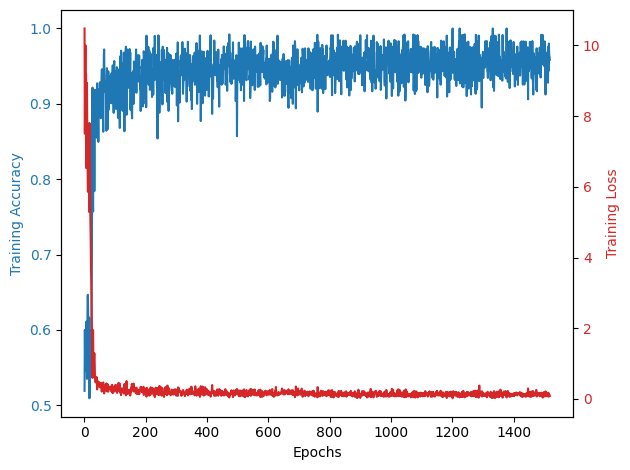

In [12]:
# prompt: graph train_accuracy and train_loss in the same graph

import matplotlib.pyplot as plt

# Extract the relevant data from the DataFrame
train_accuracy = df['train_accuracy']
train_loss = df['train_loss']
epochs = range(1, len(train_accuracy) + 1)

# Create the plot
fig, ax1 = plt.subplots()

# Plot the training accuracy
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy', color=color)
ax1.plot(epochs, train_accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin axis for the training loss
ax2 = ax1.twinx()

# Plot the training loss
color = 'tab:red'
ax2.set_ylabel('Training Loss', color=color)
ax2.plot(epochs, train_loss, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
fig.tight_layout()
plt.show()

In [13]:
# prompt: crear una función que obtenga la última métrica de df result

def get_last_metrics(df):
  """
  Obtiene las últimas métricas del DataFrame.

  Args:
    df: El DataFrame que contiene las métricas.

  Returns:
    Un diccionario con las últimas métricas.
  """
  last_row = df.iloc[-1]
  return {
      'train_loss': last_row['train_loss'],
      'train_accuracy': last_row['train_accuracy'],
  }

# Ejemplo de uso
last_metrics = get_last_metrics(df)
print(last_metrics)

{'train_loss': 0.08359, 'train_accuracy': 0.95833}


In [ ]:
!pip install datasets seaborn